In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [2]:
df_crime = pd.read_csv('table_8_offenses_known_to_law_enforcement_new_york_by_city_2013.csv')

In [3]:
df_crime_rev = df_crime[['City', 'Population', 'Violent\ncrime', 'Murder and\nnonnegligent\nmanslaughter',
       'Rape\n(revised\ndefinition)1', 'Robbery', 'Aggravated\nassault', 'Property\ncrime', 'Burglary',
       'Larceny-\ntheft', 'Arson3']]

In [4]:
df_crime_rev.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Arson3
0,Adams Village,"1,861",0,0.0,NaN,0,0,12,2,10,0.0
1,Addison Town and Village,"2,577",3,0.0,NaN,0,3,24,3,20,0.0
2,Akron Village,"2,846",3,0.0,NaN,0,3,16,1,15,0.0
3,Albany,"97,956",791,8.0,NaN,227,526,"4,090",705,"3,243",NaN
4,Albion Village,"6,388",23,0.0,NaN,4,16,223,53,165,NaN


In [5]:
df_crime_rev.describe()

,Murder and nonnegligent manslaughter,Rape (revised definition)1,Arson3
count,348.000000,0.0,187.000000
mean,1.566092,NaN,1.871658
std,18.303673,NaN,10.693411
min,0.000000,NaN,0.000000
25%,0.000000,NaN,0.000000
50%,0.000000,NaN,0.000000
75%,0.000000,NaN,1.000000
max,335.000000,NaN,132.000000


In [6]:
df_crime_rev = df_crime_rev.dropna(axis=0,subset=['Property\ncrime'])

In [7]:
df_crime_rev.Population = df_crime_rev.Population.str.replace(',', '').astype(float)
df_crime_rev.Robbery = df_crime_rev.Robbery.str.replace(',', '').astype(float)
df_crime_rev['Violent\ncrime'] = df_crime_rev['Violent\ncrime'].str.replace(',', '').astype(float)
df_crime_rev['Aggravated\nassault'] = df_crime_rev['Aggravated\nassault'].str.replace(',', '').astype(float)
df_crime_rev['Burglary'] = df_crime_rev['Burglary'].str.replace(',', '').astype(float)
df_crime_rev['Larceny-\ntheft'] = df_crime_rev['Larceny-\ntheft'].str.replace(',', '').astype(float)
df_crime_rev['Property\ncrime'] = df_crime_rev['Property\ncrime'].str.replace(',', '').astype(float)

In [8]:
df_crime_rev.dtypes

City                                       object
Population                                float64
Violent\ncrime                            float64
Murder and\nnonnegligent\nmanslaughter    float64
Rape\n(revised\ndefinition)1              float64
Robbery                                   float64
Aggravated\nassault                       float64
Property\ncrime                           float64
Burglary                                  float64
Larceny-\ntheft                           float64
Arson3                                    float64
dtype: object

In [9]:
for column in df_crime_rev.columns[2:]:
    df_crime_rev[column + ' per cap'] = df_crime_rev[column] / df_crime_rev.Population

In [10]:
#scale per cap and population from 0 to 1

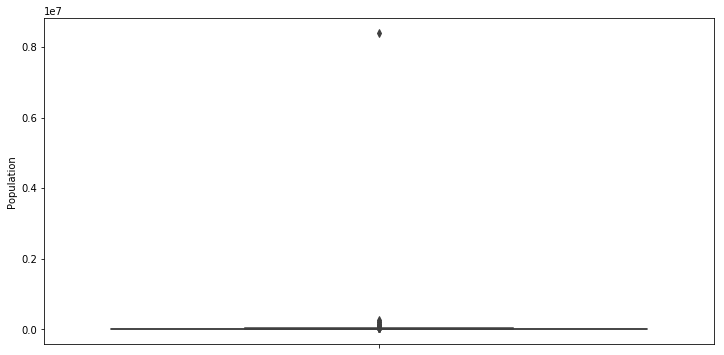

In [11]:
plt.figure(figsize=(12,6))
sns.boxplot(y=df_crime_rev.Population)
plt.show()

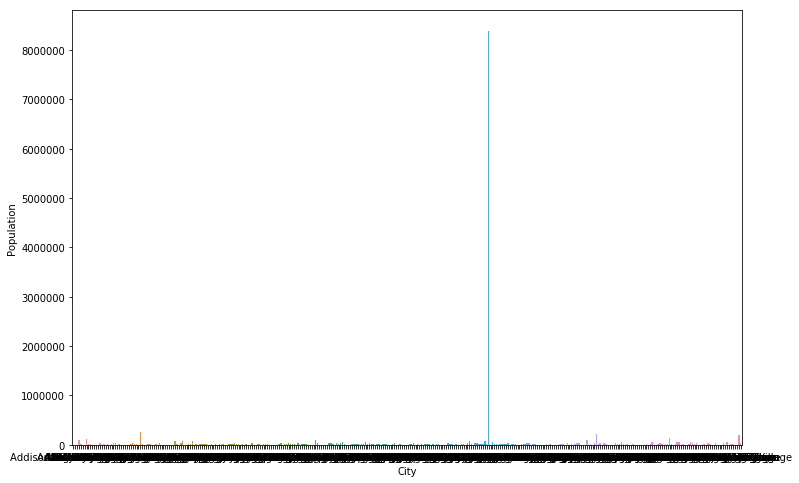

In [12]:
plt.figure(figsize=(12,8))
sns.barplot(x='City', y='Population', data = df_crime_rev)
plt.show()

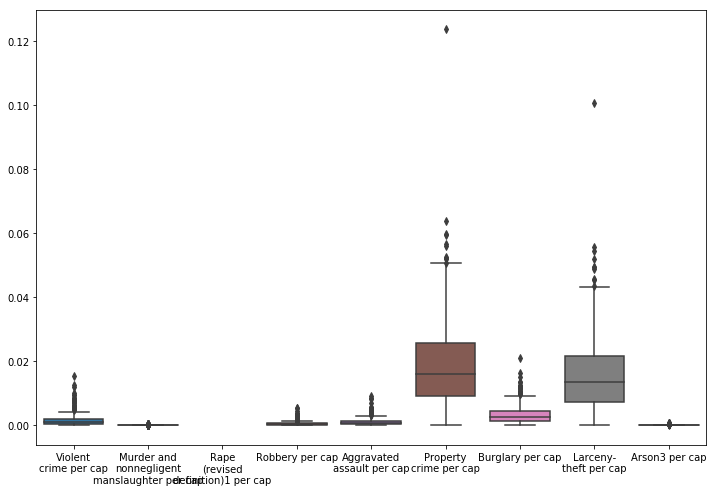

In [13]:
plt.figure(figsize=(12,8))
sns.boxplot(data = df_crime_rev[['Violent\ncrime per cap',
       'Murder and\nnonnegligent\nmanslaughter per cap', 'Rape\n(revised\ndefinition)1 per cap', 
       'Robbery per cap','Aggravated\nassault per cap', 'Property\ncrime per cap',
       'Burglary per cap', 'Larceny-\ntheft per cap', 'Arson3 per cap']])
plt.show()

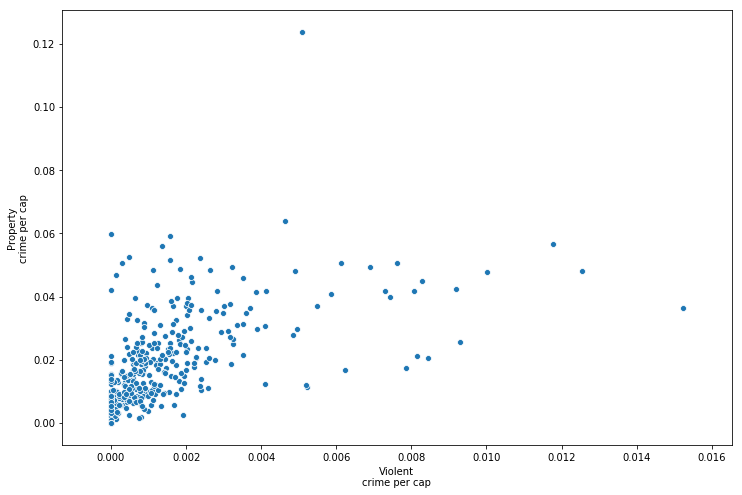

In [14]:
plt.figure(figsize=(12,8))
sns.scatterplot(x = 'Violent\ncrime per cap', y='Property\ncrime per cap', data = df_crime_rev)
plt.show()

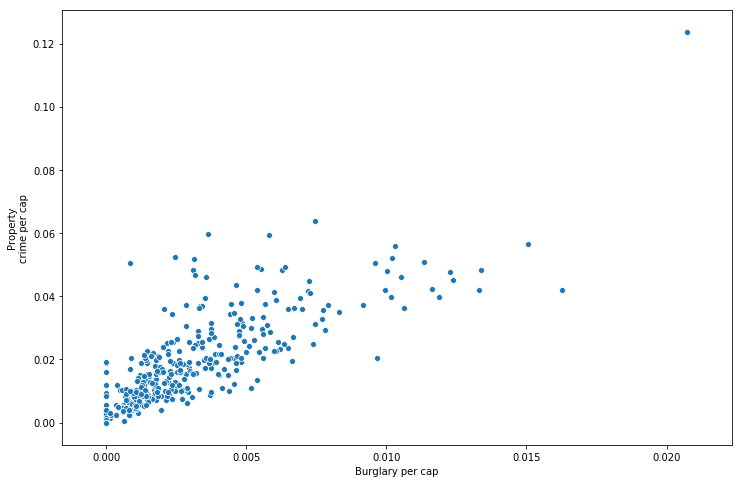

In [15]:
plt.figure(figsize=(12,8))
sns.scatterplot(x = 'Burglary per cap', y='Property\ncrime per cap', data = df_crime_rev)
plt.show()

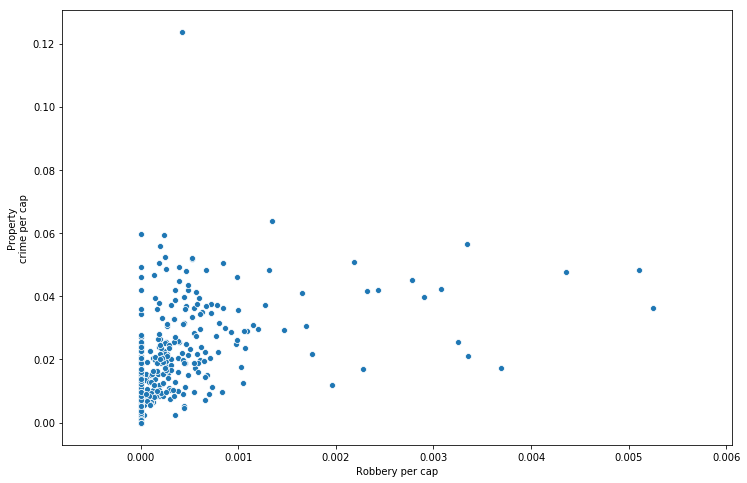

In [16]:
plt.figure(figsize=(12,8))
sns.scatterplot(x = 'Robbery per cap', y='Property\ncrime per cap', data = df_crime_rev)
plt.show()

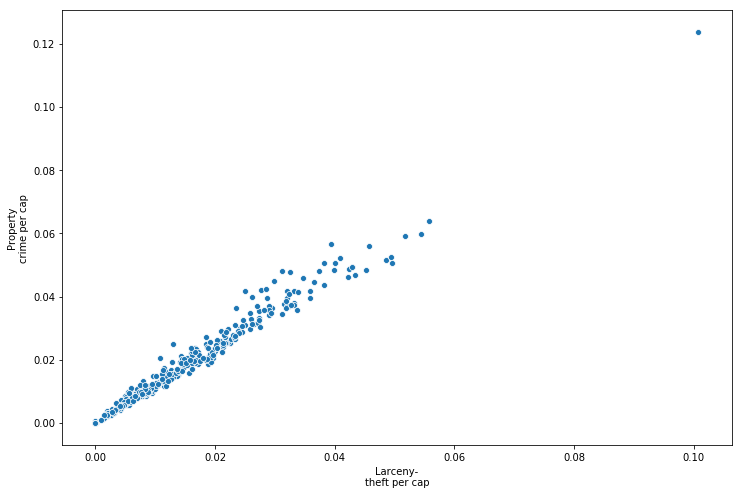

In [17]:
plt.figure(figsize=(12,8))
sns.scatterplot(x = 'Larceny-\ntheft per cap', y='Property\ncrime per cap', data = df_crime_rev)
plt.show()

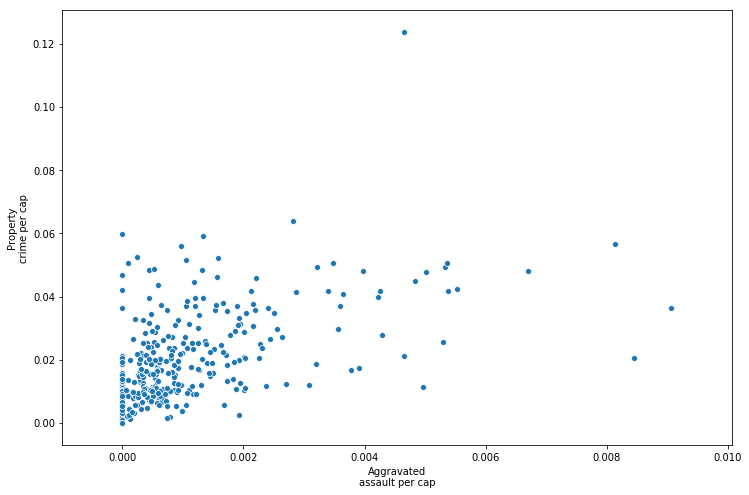

In [18]:
plt.figure(figsize=(12,8))
sns.scatterplot(x = 'Aggravated\nassault per cap', y='Property\ncrime per cap', data = df_crime_rev)
plt.show()

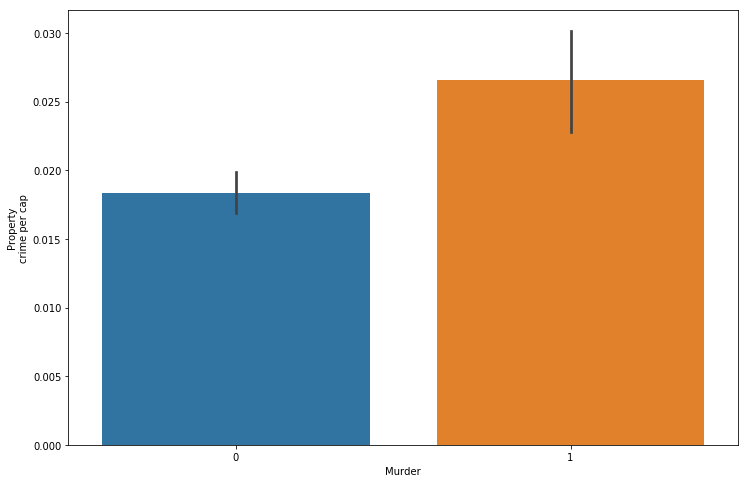

In [22]:
plt.figure(figsize=(12,8))
sns.barplot(x = 'Murder', y='Property\ncrime per cap', data = df_crime_rev)
plt.show()

### Create features for model

In [20]:
df_crime_rev['Population^2'] = df_crime_rev['Population'] ** 2

In [21]:
df_crime_rev['Murder'] = np.where(df_crime_rev['Murder and\nnonnegligent\nmanslaughter'] == 0, 0, 1)
df_crime_rev['Robbery_feat'] = np.where(df_crime_rev['Robbery'] == 0, 0, 1)

In [23]:
df_crime_rev.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,...,Rape (revised definition)1 per cap,Robbery per cap,Aggravated assault per cap,Property crime per cap,Burglary per cap,Larceny- theft per cap,Arson3 per cap,Population^2,Murder,Robbery_feat
0,Adams Village,1861.0,0.0,0.0,NaN,0.0,0.0,12.0,2.0,10.0,...,NaN,0.000000,0.000000,0.006448,0.001075,0.005373,0.0,3.463321e+06,0,0
1,Addison Town and Village,2577.0,3.0,0.0,NaN,0.0,3.0,24.0,3.0,20.0,...,NaN,0.000000,0.001164,0.009313,0.001164,0.007761,0.0,6.640929e+06,0,0
2,Akron Village,2846.0,3.0,0.0,NaN,0.0,3.0,16.0,1.0,15.0,...,NaN,0.000000,0.001054,0.005622,0.000351,0.005271,0.0,8.099716e+06,0,0
3,Albany,97956.0,791.0,8.0,NaN,227.0,526.0,4090.0,705.0,3243.0,...,NaN,0.002317,0.005370,0.041753,0.007197,0.033107,NaN,9.595378e+09,1,1
4,Albion Village,6388.0,23.0,0.0,NaN,4.0,16.0,223.0,53.0,165.0,...,NaN,0.000626,0.002505,0.034909,0.008297,0.025830,NaN,4.080654e+07,0,1


In [24]:
x = df_crime_rev[['Population', 'Murder', 'Violent\ncrime per cap', 'Robbery per cap',
       'Aggravated\nassault per cap', 'Burglary per cap']]
y = df_crime_rev['Property\ncrime']

In [25]:
regr = linear_model.LinearRegression()

regr.fit(x, y)

print('Coefficients: \n', regr.coef_)
print('Intercept: \n', regr.intercept_)
print('R-squared: \n', regr.score(x, y))

Coefficients: 
 [ 1.68132808e-02 -1.33836833e+01  1.72641178e+05  3.84457925e+05
 -2.11442769e+05  3.86153911e+04]
Intercept: 
 -191.47724307636986
R-squared: 
 0.9959420849808373


In [26]:
print(regr.fit(x, y))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)


In [27]:
# use train test split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
print('With 20% Holdout: ' + str(regr.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(regr.fit(x, y).score(x, y)))

With 20% Holdout: 0.7705662926949416
Testing on Sample: 0.9959420849808373


In [28]:
# do cross-validation up here
from sklearn.model_selection import cross_val_score
cross_val_score(regr, x, y, cv=10)

array([ 0.88925206,  0.76154661,  0.03388189,  0.79839657, -0.28095805,
       -5.35543865,  0.31726406,  0.78076081,  0.85761642,  0.61480149])

### Recursive feature eliimination

In [ ]:
# pick 2-3 independent variables and build bottoms up what is moving the model
# recursive feature elimination
from sklearn.feature_selection import RFE


In [175]:
# pick 2-3 independent variables and build bottoms up what is moving the model
# recursive feature elimination
x1 = df_crime_rev[['Population', 'Murder', 'Violent\ncrime per cap']]
y1 = df_crime_rev['Property\ncrime']

regr.fit(x1, y1)
X_train1, X_test1, y_train1, y_test1 = train_test_split(x1, y1, test_size=0.2)
print('With 20% Holdout: ' + str(regr.fit(X_train1, y_train1).score(X_test1, y_test1)))
print('Testing on Sample: ' + str(regr.fit(x1, y1).score(x1, y1)))

With 20% Holdout: 0.7193452788197217
Testing on Sample: 0.9951459077392798


In [176]:
x2 = df_crime_rev[['Population', 'Murder', 'Robbery per cap']]
y2 = df_crime_rev['Property\ncrime']

regr.fit(x2, y2)
X_train2, X_test2, y_train2, y_test2 = train_test_split(x2, y2, test_size=0.2)
print('With 20% Holdout: ' + str(regr.fit(X_train2, y_train2).score(X_test2, y_test2)))
print('Testing on Sample: ' + str(regr.fit(x2, y2).score(x2, y2)))

With 20% Holdout: 0.8754753489051629
Testing on Sample: 0.9957979001476014


In [177]:
x3 = df_crime_rev[['Population', 'Murder', 'Aggravated\nassault per cap']]
y3 = df_crime_rev['Property\ncrime']

regr.fit(x3, y3)
X_train3, X_test3, y_train3, y_test3 = train_test_split(x3, y3, test_size=0.2)
print('With 20% Holdout: ' + str(regr.fit(X_train3, y_train3).score(X_test3, y_test3)))
print('Testing on Sample: ' + str(regr.fit(x3, y3).score(x3, y3)))

With 20% Holdout: 0.7855481348081627
Testing on Sample: 0.9944936735502409


In [178]:
x4 = df_crime_rev[['Population', 'Murder', 'Burglary per cap']]
y4 = df_crime_rev['Property\ncrime']

regr.fit(x4, y4)
X_train4, X_test4, y_train4, y_test4 = train_test_split(x4, y4, test_size=0.2)
print('With 20% Holdout: ' + str(regr.fit(X_train4, y_train4).score(X_test4, y_test4)))
print('Testing on Sample: ' + str(regr.fit(x4, y4).score(x4, y4)))

With 20% Holdout: 0.653715962068816
Testing on Sample: 0.9946751487574146


## Test regression model on new dataset

In [29]:
df_crime_2014 = pd.read_csv('Table_8_Offenses_Known_to_Law_Enforcement_by_New_York_by_City_2014.csv')
df_crime_2014_rev = df_crime_2014[['City', 'Population', 'Violent\ncrime', 'Murder and\nnonnegligent\nmanslaughter',
       'Robbery', 'Aggravated\nassault', 'Property\ncrime', 'Burglary',
       'Larceny-\ntheft', 'Arson3']]

In [30]:
df_crime_2014_rev = df_crime_2014_rev.dropna(axis=0,subset=['Property\ncrime'])
df_crime_2014_rev.Population = df_crime_2014_rev.Population.str.replace(',', '').astype(float)
df_crime_2014_rev.Robbery = df_crime_2014_rev.Robbery.str.replace(',', '').astype(float)
df_crime_2014_rev['Violent\ncrime'] = df_crime_2014_rev['Violent\ncrime'].str.replace(',', '').astype(float)
df_crime_2014_rev['Aggravated\nassault'] = df_crime_2014_rev['Aggravated\nassault'].str.replace(',', '').astype(float)
df_crime_2014_rev['Burglary'] = df_crime_2014_rev['Burglary'].str.replace(',', '').astype(float)
df_crime_2014_rev['Larceny-\ntheft'] = df_crime_2014_rev['Larceny-\ntheft'].str.replace(',', '').astype(float)
df_crime_2014_rev['Property\ncrime'] = df_crime_2014_rev['Property\ncrime'].str.replace(',', '').astype(float)

In [31]:
df_crime_2014_rev.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Arson3
0,Adams Village,1851.0,0.0,0.0,0.0,0.0,11.0,1.0,10.0,0.0
1,Addison Town and Village,2568.0,2.0,0.0,1.0,1.0,49.0,1.0,47.0,0.0
2,Afton Village4,820.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,Akron Village,2842.0,1.0,0.0,0.0,1.0,17.0,0.0,17.0,0.0
4,Albany4,98595.0,802.0,8.0,237.0,503.0,3888.0,683.0,3083.0,12.0


In [32]:
df_crime_2014_rev.dtypes

City                                       object
Population                                float64
Violent\ncrime                            float64
Murder and\nnonnegligent\nmanslaughter    float64
Robbery                                   float64
Aggravated\nassault                       float64
Property\ncrime                           float64
Burglary                                  float64
Larceny-\ntheft                           float64
Arson3                                    float64
dtype: object

In [33]:
for column in df_crime_2014_rev.columns[2:]:
    df_crime_2014_rev[column + ' per cap'] = df_crime_2014_rev[column] / df_crime_2014_rev.Population

df_crime_2014_rev['Murder'] = np.where(df_crime_2014_rev['Murder and\nnonnegligent\nmanslaughter'] == 0, 0, 1)

In [36]:
x_2014 = df_crime_2014_rev[['Population', 'Murder', 'Violent\ncrime per cap', 'Robbery per cap',
       'Aggravated\nassault per cap', 'Burglary per cap']]
y_2014 = df_crime_2014_rev['Property\ncrime']

In [43]:
print('R-squared regression on new dataset:', regr.score(x_2014, y_2014))

R-squared regression on new dataset: 0.9926557812277371
